In [2]:
import stata_setup
stata_setup.config(r'c:/program files/stata17', 'mp')


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Single-user 2-core  perpetual
Serial number: 501706396569
  Licensed to: linchao
               me

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.


We will be using data from the United States National Health and Nutrition Examination Survey (NHANES). Specifically, we will be using the variables age from the [demographic](https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Demographics&CycleBeginYear=2015) data,
HbA1c from the [glycohemoglobin](https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Laboratory&CycleBeginYear=2015) data, and [diabetes](https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire&CycleBeginYear=2015) from the diabetes data.


```stata
import sasxport5 "https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.XPT", clear
save age.dta, replace
import sasxport5 "https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/GHB_I.XPT", clear
save glucose.dta, replace
import sasxport5 "https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DIQ_I.XPT", clear
```
note 
歸納起來應該是2015是`I`例如`https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Demographics&CycleBeginYear=2015` 改後面的2015為2013那就是後面的程式碼,2013 是`H`結尾

In [3]:
%%stata
                  
import sasxport5 "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2013/DataFiles/DEMO_H.xpt", clear
save age.dta, replace
import sasxport5 "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2013/DataFiles/GHB_H.xpt",clear

save glucose.dta, replace
import sasxport5 "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2013/DataFiles/DIQ_H.xpt", clear
save diabetes, replace

merge 1:1 seqn using "glucose.dta"
drop _merge
merge 1:1 seqn using "age.dta"

rename ridageyr age
rename lbxgh HbA1c
rename diq010 diabetes
recode diabetes (1 = 1) (2/3 = 0) (9=.)

keep diabetes age HbA1c
drop if missing(diabetes, age, HbA1c)
save diabetes, replace

//erase age.dta
//erase glucose.dta


.                   
. import sasxport5 "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2013/DataFiles
> /DEMO_H.xpt", clear

. save age.dta, replace
file age.dta saved

. import sasxport5 "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2013/DataFiles
> /GHB_H.xpt",clear

. 
. save glucose.dta, replace
file glucose.dta saved

. import sasxport5 "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2013/DataFiles
> /DIQ_H.xpt", clear

. save diabetes, replace
file diabetes.dta saved

. 
. merge 1:1 seqn using "glucose.dta"

    Result                      Number of obs
    -----------------------------------------
    Not matched                         2,791
        from master                     2,791  (_merge==1)
        from using                          0  (_merge==2)

    Matched                             6,979  (_merge==3)
    -----------------------------------------

. drop _merge

. merge 1:1 seqn using "age.dta"

    Result                      Number of obs
    --------------------

In [10]:
%%stata
list in 1/5
tabulate diabetes


. list in 1/5

     +------------------------+
     | diabetes   HbA1c   age |
     |------------------------|
  1. |        1    13.9    69 |
  2. |        1     9.1    54 |
  3. |        1     8.9    72 |
  4. |        0     4.9    73 |
  5. |        0     5.5    56 |
     +------------------------+

. tabulate diabetes

Doctor told |
   you have |
   diabetes |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      5,950       89.64       89.64
          1 |        688       10.36      100.00
------------+-----------------------------------
      Total |      6,638      100.00

. 



. python:
----------------------------------------------- python (type end to exit) -----
>>> # Import the necessary packages
... import pandas as pd
>>> import matplotlib.pyplot as plt
>>> import matplotlib.colors as mcolors
>>> 
>>> # Read the Stata dataset into Python
... data = pd.read_stata('diabetes.dta',
... convert_categoricals=False,
... preserve_dtypes=True,
... convert_missing=False)
>>> 
>>> # Define the feature matrix (independent variables)
... # and the target variable (dependent variable)
... X = data[['age','HbA1c']]
>>> y = data['diabetes']
>>> 
>>> # Plot the raw data
... plt.scatter(X['age'], X['HbA1c'],
... c=y,
... cmap = mcolors.ListedColormap(["navy", "darkred"]))


Text(0.5, 0, 'Age (years)')

Text(0, 0.5, 'HbA1c')

([<matplotlib.axis.XTick at 0x23ac65cd3d0>,
 [Text(12, 0, '12'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80')])

([<matplotlib.axis.YTick at 0x23ac877a6f0>,
 [Text(0, 4, '4'),
  Text(0, 6, '6'),
  Text(0, 8, '8'),
  Text(0, 10, '10'),
  Text(0, 12, '12'),
  Text(0, 14, '14'),
  Text(0, 16, '16')])

Text(0.5, 1.0, 'Diabetes status by Age and HbA1c')

>>> plt.xlabel('Age (years)')
>>> plt.ylabel('HbA1c')
>>> plt.xticks((12,20,30,40,50,60,70,80))
>>> plt.yticks((4,6,8,10,12,14,16))
>>> plt.title('Diabetes status by Age and HbA1c')
>>> 
>>> # Save the graph
... plt.savefig("scatterplot.png")
>>> end
-------------------------------------------------------------------------------

. 


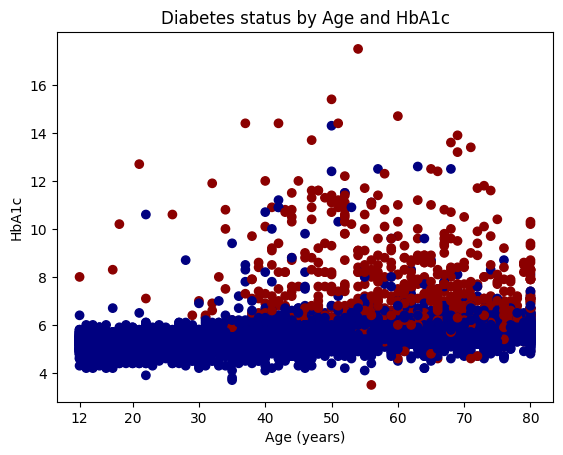

In [11]:
%%stata
python:
# Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Read the Stata dataset into Python
data = pd.read_stata('diabetes.dta',
convert_categoricals=False,
preserve_dtypes=True,
convert_missing=False)

# Define the feature matrix (independent variables)
# and the target variable (dependent variable)
X = data[['age','HbA1c']]
y = data['diabetes']

# Plot the raw data
plt.scatter(X['age'], X['HbA1c'],
c=y,
cmap = mcolors.ListedColormap(["navy", "darkred"]))
plt.xlabel('Age (years)')
plt.ylabel('HbA1c')
plt.xticks((12,20,30,40,50,60,70,80))
plt.yticks((4,6,8,10,12,14,16))
plt.title('Diabetes status by Age and HbA1c')

# Save the graph
plt.savefig("scatterplot.png")
end

In [15]:
%%stata
python:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
random_state=0)
end


. python:
----------------------------------------------- python (type end to exit) -----
>>> from sklearn.model_selection import train_test_split
>>> 
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
... random_state=0)
>>> end
-------------------------------------------------------------------------------

. 


In [16]:
%%stata

python:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Do a grid search for the parameters "degree" and "C" using 10-fold
# cross-validation
model = svm.SVC(kernel='poly')
parameters = {'degree':[1,2,3], 'C':[1,2,3]}
poly_svc = GridSearchCV(model,
parameters,
cv=10,
scoring='accuracy').fit(X_train, y_train)

# Display the parameters that yield the best-fitting model
poly_svc.fit(X_train,y_train)
print(poly_svc.best_params_)
end


. 
. python:
----------------------------------------------- python (type end to exit) -----
>>> from sklearn import svm
>>> from sklearn.model_selection import cross_val_score
>>> from sklearn.model_selection import GridSearchCV
>>> 
>>> # Do a grid search for the parameters "degree" and "C" using 10-fold
... # cross-validation
... model = svm.SVC(kernel='poly')
>>> parameters = {'degree':[1,2,3], 'C':[1,2,3]}
>>> poly_svc = GridSearchCV(model,
... parameters,
... cv=10,
... scoring='accuracy').fit(X_train, y_train)
>>> 
>>> # Display the parameters that yield the best-fitting model
... poly_svc.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=SVC(kernel='poly'),
             param_grid={'C': [1, 2, 3], 'degree': [1, 2, 3]},
             scoring='accuracy')

>>> print(poly_svc.best_params_)
{'C': 3, 'degree': 3}
>>> end
-------------------------------------------------------------------------------

. 
